In [9]:
# for python 2 compatibility #
from __future__ import print_function
#                            #
import numpy as np
from skimage import io, color, transform
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
# notebook
from matplotlib.colors import ListedColormap
import matplotlib.pylab as pylab
pylab.rcParams['font.size'] = 24

def squarePlot():
    pylab.rcParams['figure.figsize'] = (10, 10)
    
def rectPlot():
    pylab.rcParams['figure.figsize'] = (32.0 * 2/3, 24.0 * 2/5)

import csv
import math

In [10]:
def toInt(n):
    chars = list(filter(lambda c : c != ',', n))
    x = len(chars)
    return sum([int(c)*10**(x-i) for i, c in enumerate(chars)])

def readData(file):
    rows = []
    with open(file+'.csv', 'rt') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            rows.append(row)

    # filter out non-data rows:
    rows = rows[2:len(rows)-1]
    
    return rows

rows = readData('sleep-data/0216')
rows += readData('sleep-data/0316')
rows += readData('sleep-data/0416')

sleepDates         = [row[0] for row in rows]
minutesAsleep      = [toInt(row[1]) for row in rows]
minutesAwake       = [toInt(row[2]) for row in rows]
numberOfAwakenings = [toInt(row[3]) for row in rows]
timeInBed          = [toInt(row[4]) for row in rows]

rows = readData('activities-data/0216')
rows += readData('activities-data/0316')
rows += readData('activities-data/0416')

activityDates        = [row[0] for row in rows]
caloriesBurned       = [toInt(row[1]) for row in rows]
steps                = [toInt(row[2]) for row in rows]
distance             = [float(row[3]) for row in rows]
floors               = [toInt(row[4]) for row in rows]
minutesSedentary     = [toInt(row[5]) for row in rows]
minutesLightlyActive = [toInt(row[6]) for row in rows]
minutesFairlyActive  = [toInt(row[7]) for row in rows]
minutesVeryActive    = [toInt(row[8]) for row in rows]
activeCalories       = [toInt(row[9]) for row in rows]

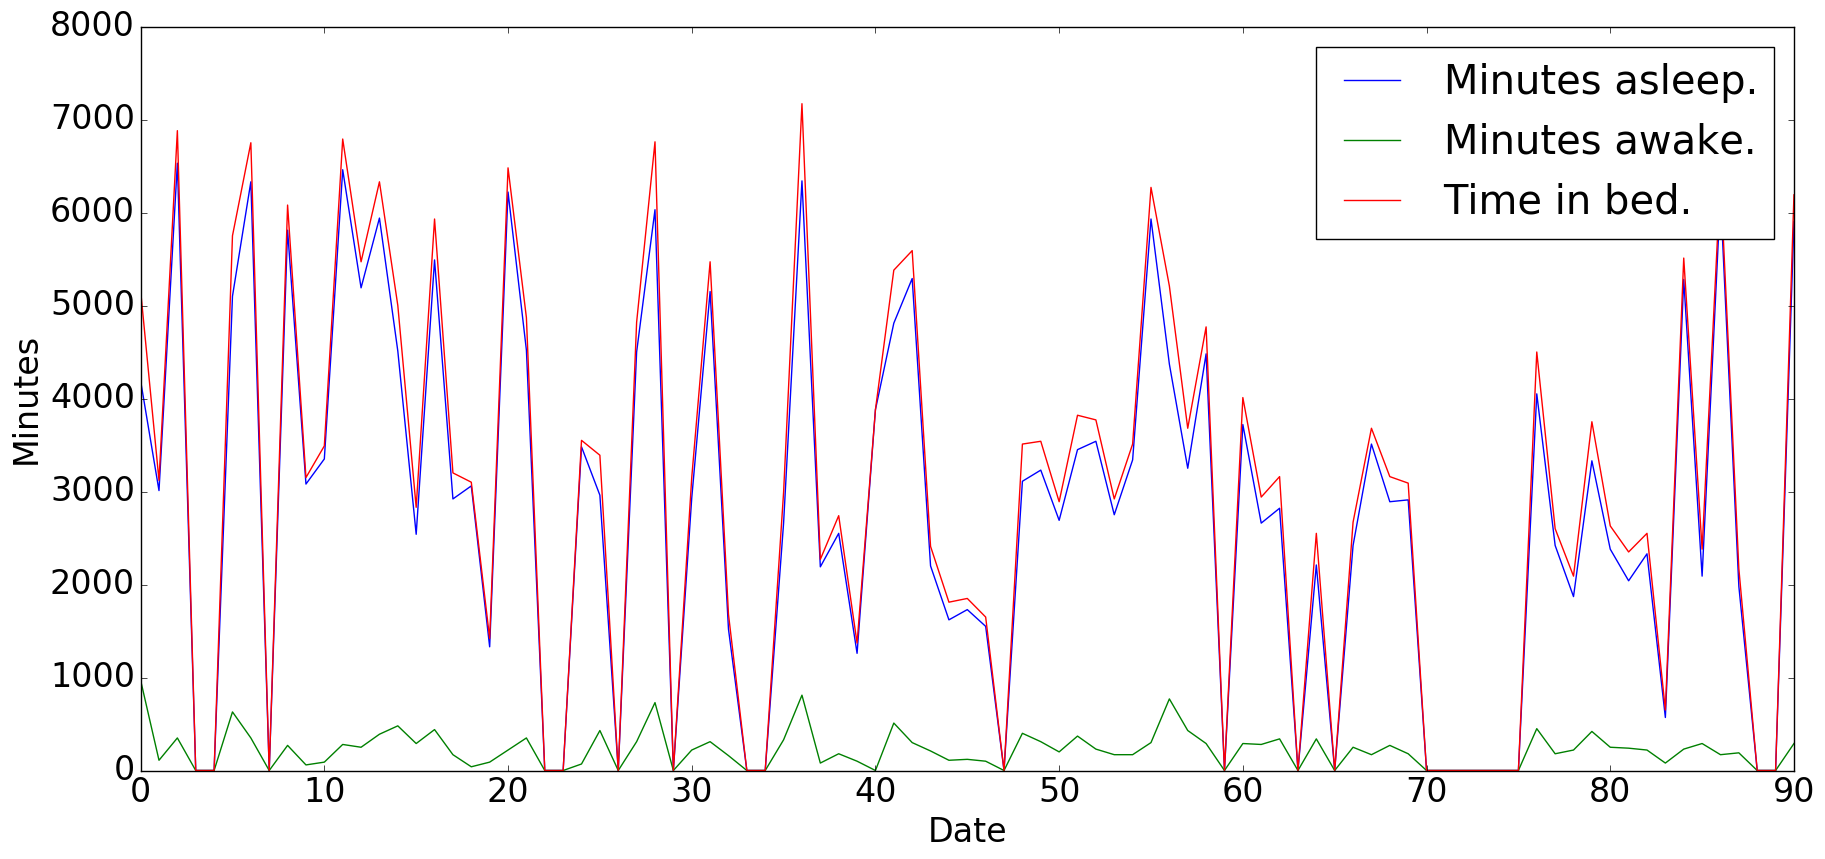

In [4]:
rectPlot()
fig = plt.figure()
ax = fig.add_subplot(111)
instances = [i for i, r in enumerate(minutesAsleep)]
ax.plot(instances, minutesAsleep, label='Minutes asleep.')
ax.plot(instances, minutesAwake, label='Minutes awake.')
ax.plot(instances, timeInBed, label='Time in bed.')
ax.set_xlabel('Date')
ax.set_ylabel('Minutes')
ax.legend(loc=1)
plt.show()

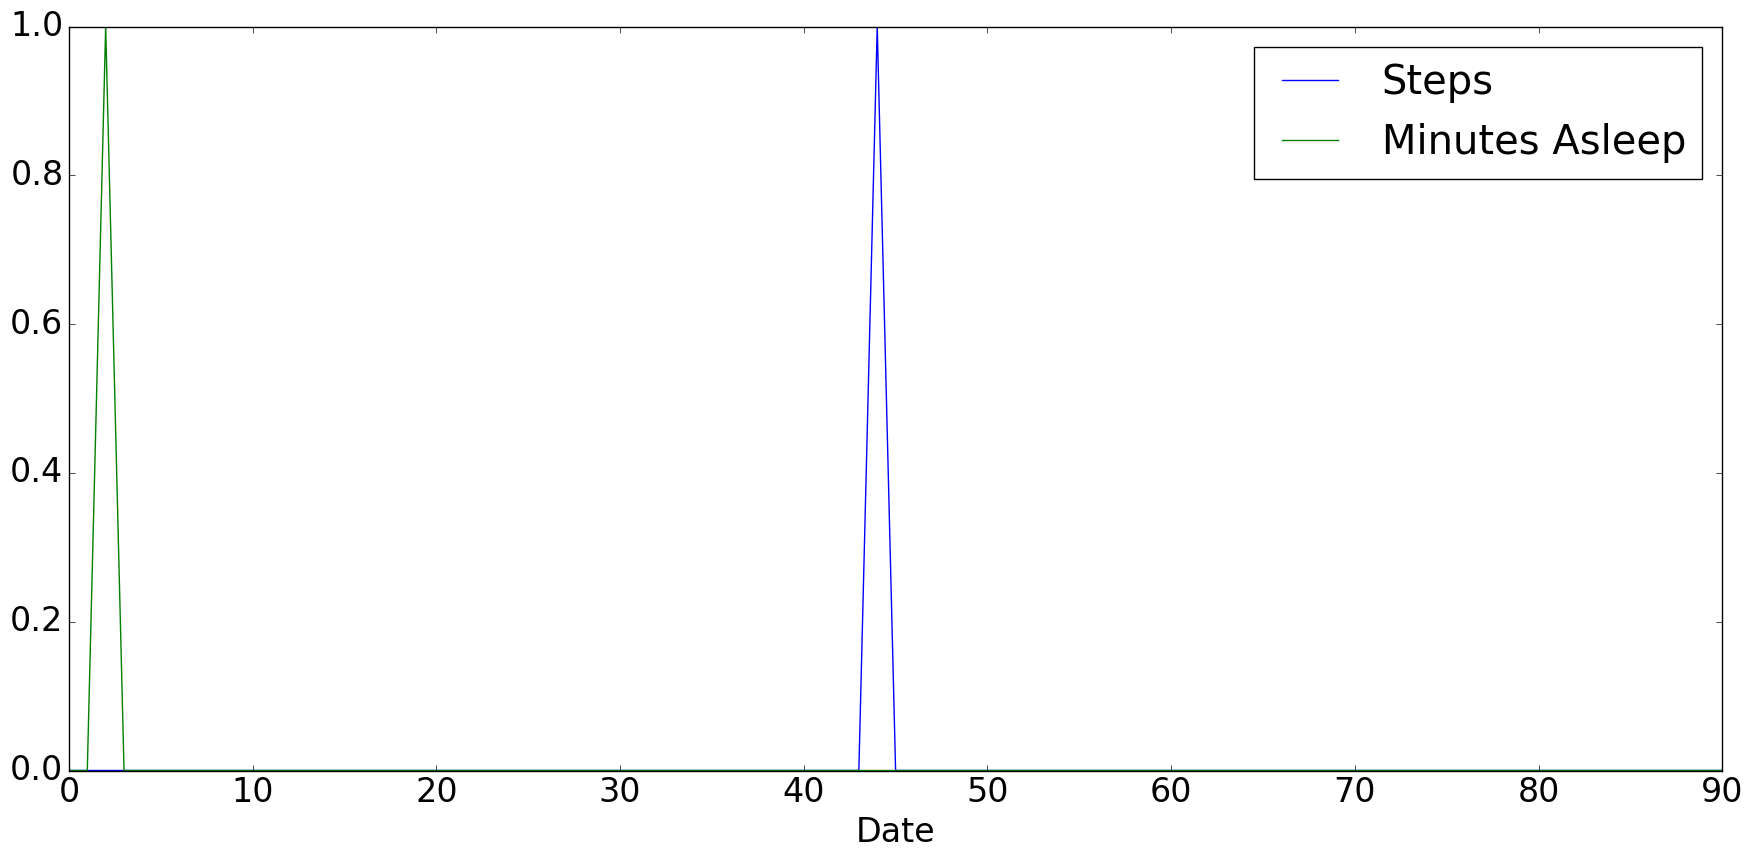

In [11]:
rectPlot()
fig = plt.figure()
ax = fig.add_subplot(111)
instances = [i for i, r in enumerate(minutesAsleep)]
ax.plot(instances, normalise(steps), label='Steps')
ax.plot(instances, normalise(minutesAsleep), label='Minutes Asleep')
ax.set_xlabel('Date')
# ax.set_ylabel('Minutes')
ax.legend(loc=0)
plt.show()

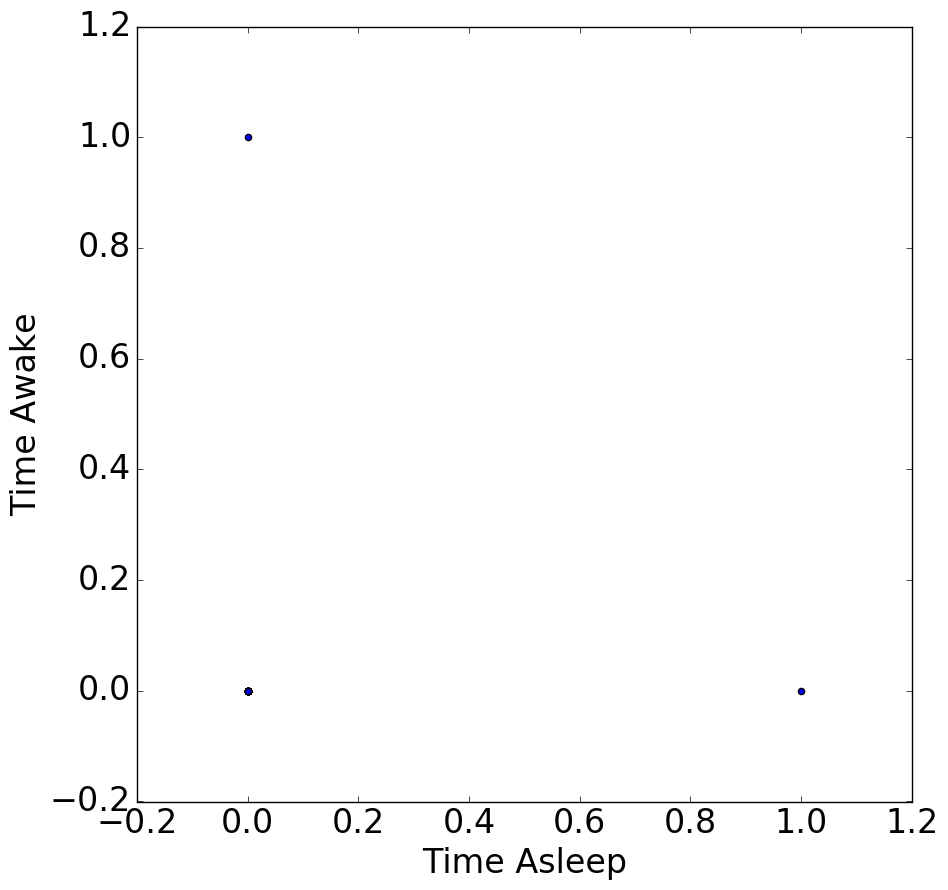

[[ 28.27169612]
 [  0.06877814]]


In [12]:
def normalise(data):
    m = max(data)
    return [x/m for x in data]

def LSM(data, p):
    xVals = []
    yVals = []
    for (x, y) in data:
        xVals.append([x**n for n in range(0, p+1)])
        yVals.append([y])
        
    y = np.matrix(yVals)
    X = np.matrix(xVals)
    XT = X.transpose()
    return ((XT*X)**(-1))*XT*y

def evalEqn(f, lower, upper, d=500):
    x = []
    y = []
    for i in range(int(lower*d), int(upper*d)):
        x.append(i/d)
        y.append(f(i/d))
    return (x, y)

# plots a scatter diagram with a best fit equation of degree n
def plotBestFit(ax, x1, x2, n, col='#00ff00'):
    data = zip(x1, x2)
    c = LSM(data, n)
    f = lambda x : sum([c[i]*(x**i) for i in range(0,len(c))])[0, 0]
    (y1, y2) = evalEqn(f, min(x1), max(x1), 2)
    ax.plot(y1, y2)
    return c

# for i, x in enumerate(minutesAsleep):
#     if x == 0:
#         minutesAsleep.pop(i)
#         minutesAwake.pop(i)

asleepNorm = normalise(minutesAsleep)
awakeNorm = normalise(minutesAwake)
squarePlot()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(asleepNorm, awakeNorm)
plotBestFit(ax, asleepNorm, awakeNorm, 1)
ax.set_xlabel('Time Asleep')
ax.set_ylabel('Time Awake')
plt.show()
mean = (np.mean(asleepNorm), np.mean(awakeNorm))
cov = np.cov([asleepNorm, awakeNorm])
print(LSM(zip(minutesAsleep, minutesAwake), 1))

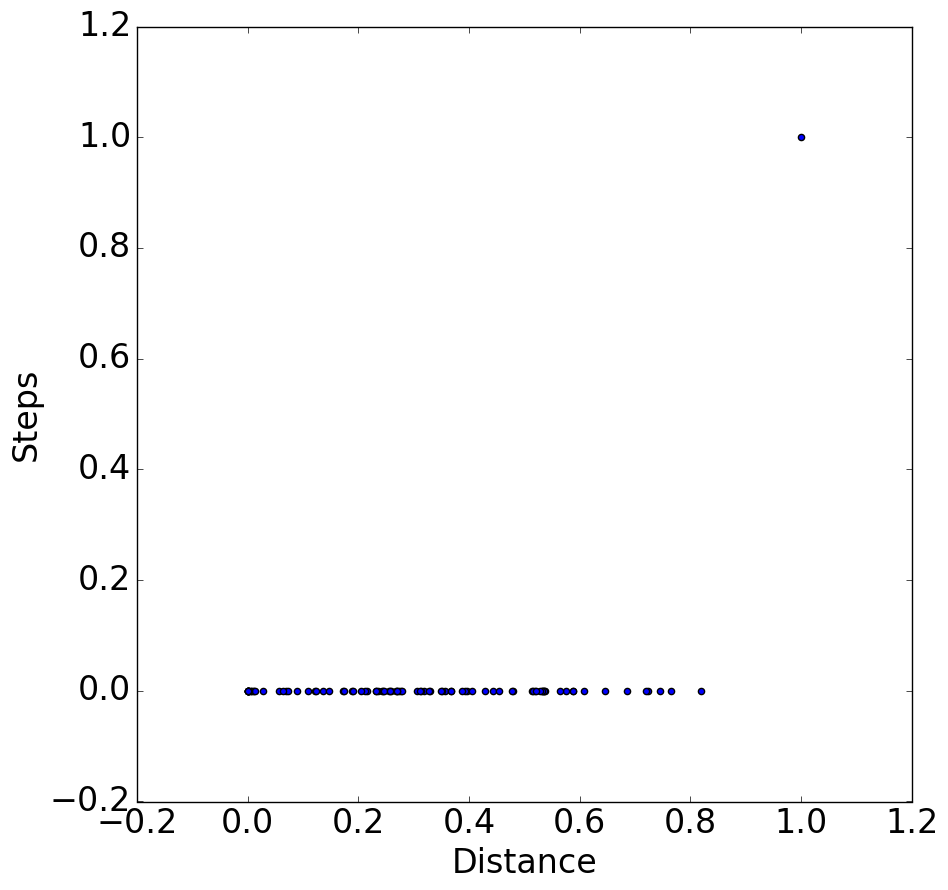

[[-0.03428269]
 [ 0.14375546]]
(0.31492160856384999, 0.01098901098901099)
[[ 0.05295091  0.00761198]
 [ 0.00761198  0.01098901]]


In [8]:
stepsNorm = normalise(steps)        
distanceNorm = normalise(distance)
    
squarePlot()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(distanceNorm, stepsNorm)
plotBestFit(ax, distanceNorm, stepsNorm, 1)
ax.set_xlabel('Distance')
ax.set_ylabel('Steps')
plt.show()
print(LSM(zip(distanceNorm, stepsNorm), 1))
mean = (np.mean(distanceNorm), np.mean(stepsNorm))
cov = np.cov([distanceNorm, stepsNorm])
print(mean)
print(cov)

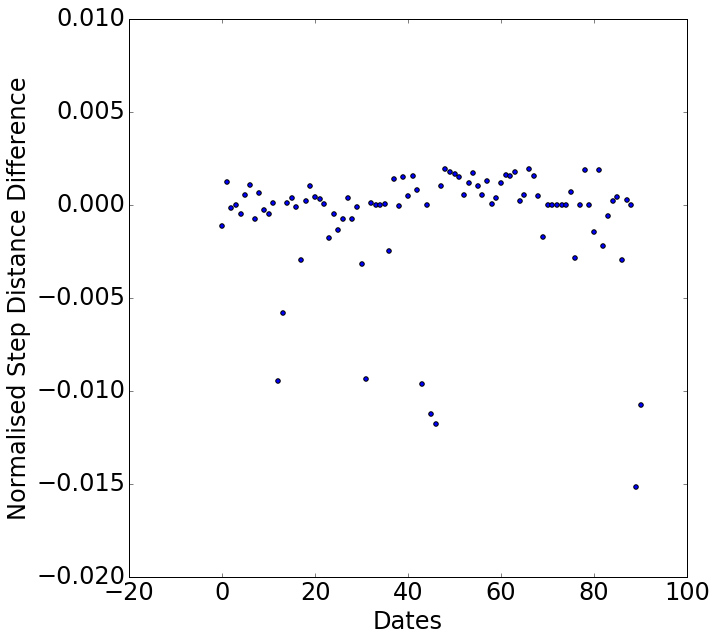

In [193]:
diff = [y - x for (x, y) in zip(distanceNorm, stepsNorm)]
squarePlot()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter([i for i,x in enumerate(diff)], diff)
ax.set_xlabel('Dates')
ax.set_ylabel('Normalised Step Distance Difference')
# plt.xlim(0, 1.1)
# plt.ylim(0, 1.1)
plt.show()

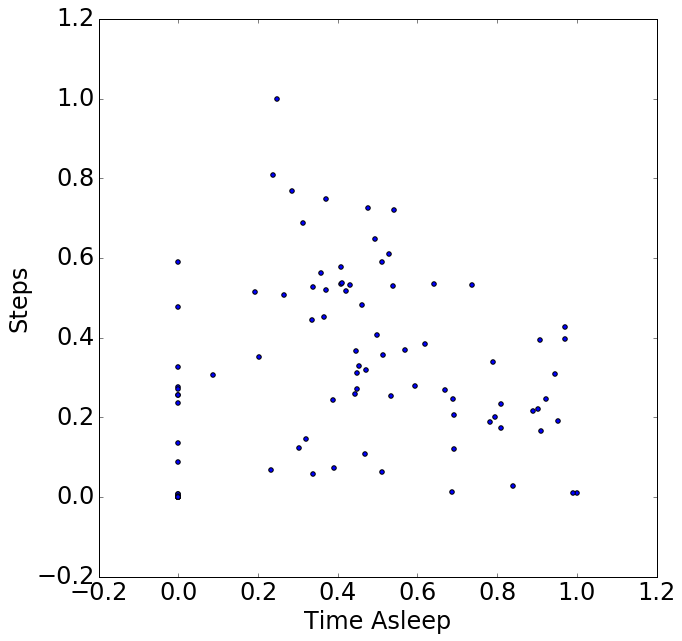

In [198]:
squarePlot()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(asleepNorm, stepsNorm)
# plotBestFit(ax, asleepNorm, stepsNorm, 1)
ax.set_xlabel('Time Asleep')
ax.set_ylabel('Steps')
plt.show()